In [158]:
!pip install tensorflow opencv-python matplotlib

In [159]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import numpy as np
import cv2
import imghdr
# Not using gpu rn cuz you can only use it in colab for limited time

In [160]:
data = "dog_data"
os.listdir(data)

['Beagle',
 'Boxer',
 'Bulldog',
 'Dachshund',
 'German_Shepherd',
 'Golden_Retriever',
 'Labrador_Retriever',
 'Poodle',
 'Rottweiler',
 'Yorkshire_Terrier']

In [161]:
for image_class in os.listdir(data):
    print(image_class)

Beagle
Boxer
Bulldog
Dachshund
German_Shepherd
Golden_Retriever
Labrador_Retriever
Poodle
Rottweiler
Yorkshire_Terrier


Test image load

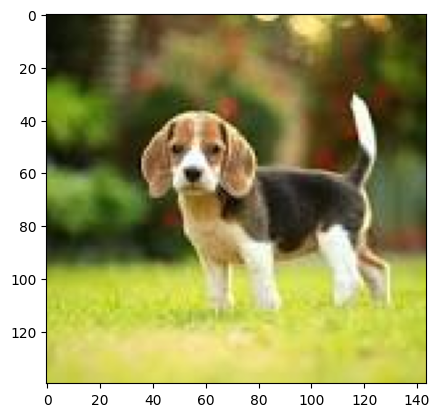

In [162]:
img = cv2.imread(os.path.join(data, "Beagle", "Beagle_9.jpg"))
img.shape
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

Access Images

In [163]:
for image_class in os.listdir(data):
    for image in os.listdir(os.path.join(data, image_class)):
        image_path = os.path.join(data, image_class, image)

Import Necessary dependecies

In [164]:
import numpy as np
from matplotlib import pyplot as plt

In [165]:
# Batch size is a trade off. The lower the longer training time but more accuracy
data = tf.keras.utils.image_dataset_from_directory("dog_data", batch_size=16, image_size=(256,256), shuffle=True)

Found 967 files belonging to 10 classes.


In [166]:
data_iterator = data.as_numpy_iterator()

In [167]:
batch = data_iterator.next()
# Images represented as numpy arrays
batch[0].shape

(16, 256, 256, 3)

In [168]:
batch[1]

array([7, 0, 3, 6, 6, 8, 0, 0, 2, 6, 7, 8, 7, 9, 6, 0])

Label & Classify dog images with Symbols

In [169]:
label_mapping = {
    0: "Beagle",
    1: "Boxer",
    2: "Bulldog",
    3: "Dachshund",
    4: "German Sheppard",
    5: "Golden Retriever",
    6: "Labrador Retriever",
    7: "Poodle",
    8: "Rottweiler",
    9: "Yorkshire Terrier"
}

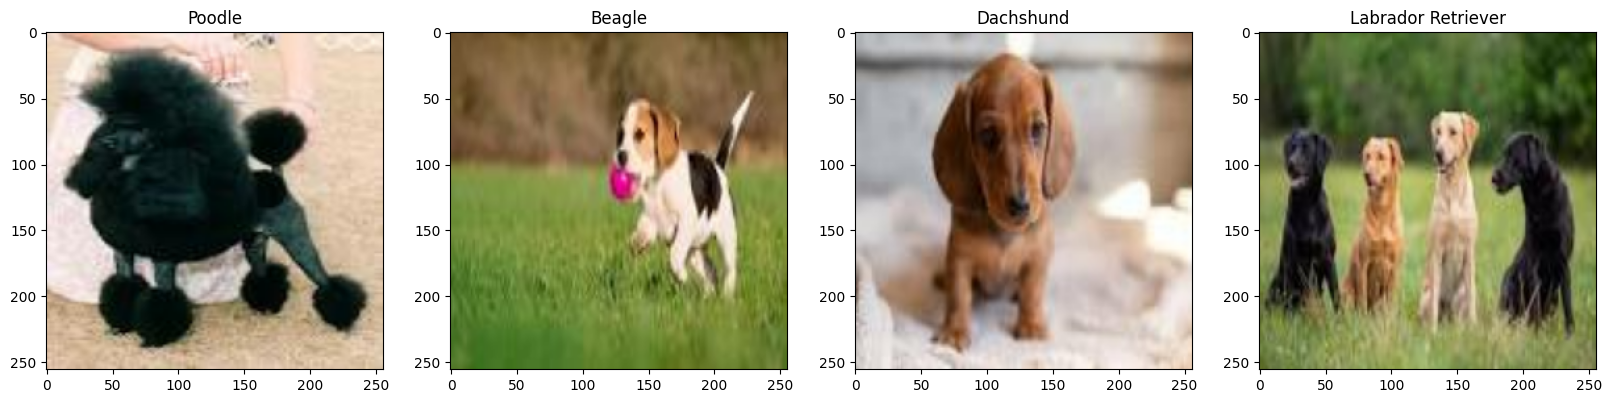

In [170]:
# Test output

fit, ax = plt.subplots(ncols=4, figsize=(20,20))
for i, img in enumerate(batch[0][:4]):
    ax[i].imshow(img.astype(int))
    label = batch[1][i]
    ax[i].set_title(label_mapping.get(label, "Unknown"))

In [175]:
batch[]

IndexError: tuple index out of range

In [101]:
scaled = batch[0] / 255

scaled.max()

1.0

Preprocess Data

Scale Data

In [102]:
# Normalized data
data = data.map(lambda x,y: (x/255,y))

scaled_iterator = data.as_numpy_iterator()

batch = scaled_iterator.next()

batch[0].max()

1.0

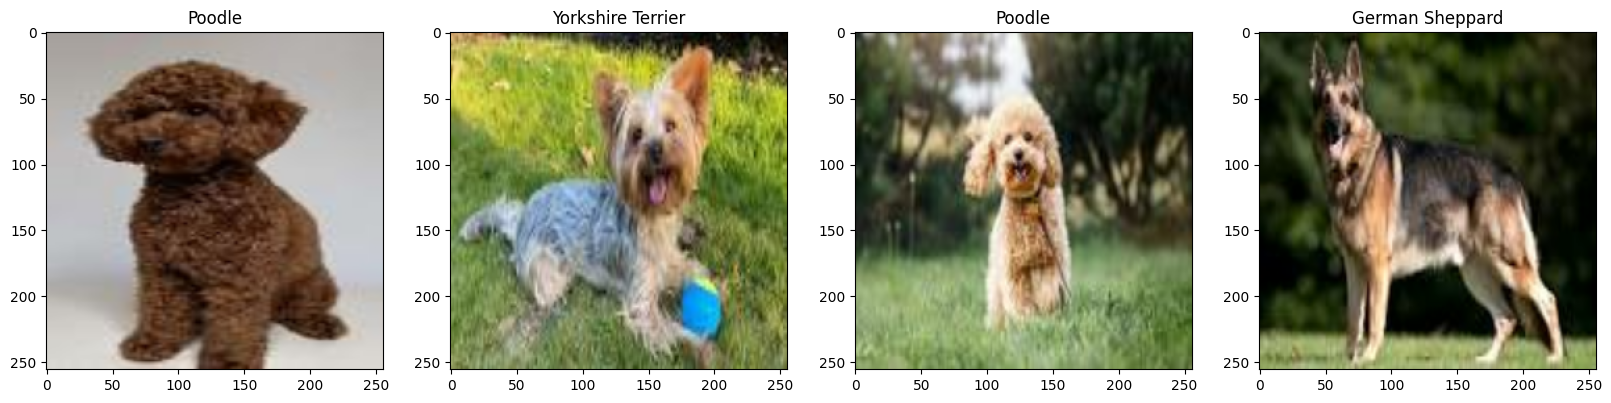

In [103]:

fit, ax = plt.subplots(ncols=4, figsize=(20,20))
for i, img in enumerate(batch[0][:4]):
    ax[i].imshow(img)
    label = batch[1][i]
    ax[i].set_title(label_mapping.get(label, 'Unknown'))

Split Data

In [104]:
total_size = len(data)

61

In [105]:
train_size = total_size*0.7
val_size = total_size*0.2
test_size = total_size*0.1 + 1
print(train_size) # Data that we're training with
print(val_size) # Data used to finetune our model
print(test_size) # Data used for final testing

42
12
7


Define Train, Validation and Test datasets

In [149]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

Conversion of the datasets into one-hot encoded labels for categorical loss function.

In [150]:
train_data = train.map(lambda x,y: (x, tf.keras.utils.to_categorical(y, num_classes=10)))
val_data = val.map(lambda x,y: (x, tf.keras.utils.to_categorical(y, num_classes=10)))
test_data = test.map(lambda x,y: (x, to_categorical(y, num_classes=10)))

Build the Deep Learning Model

Define / Add in the layers in the neural networks

In [190]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical

# Initialize the Sequential model
model = Sequential([
    # First, convolutional layer with 16 filters
    Conv2D(16, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    # Return backs the maximum possible value as the output
    MaxPooling2D(),
    # Dropout layer to reduce overfitting
    Dropout(0.25),

    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(),
    Dropout(0.25),

    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D(),
    Dropout(0.25),

    Flatten(),

    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # 10 classes for 10 breeds
])

In [191]:
model.compile("adam", loss='categorical_crossentropy', metrics=["accuracy"])

In [192]:
for batch in train_data.take(1):
    x,y =batch
    print("Shape of x:", x.shape)
    print("Shape of y:", y.shape)

Shape of x: (16, 256, 256, 3)
Shape of y: (16, 10)


In [193]:
model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_39 (Conv2D)              │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_33 (MaxPooling2D) │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_40 (Conv2D)              │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_34 (MaxPooling2D) │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_41 (Conv2D)              │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_35 (MaxPooling2D) │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,698,938 (14.11 MB)

 Trainable params: 3,698,938 (14.11 MB)

 Non-trainable params: 0 (0.00 B)

Train.

In [194]:
# Create log directory that tracks and visualizes your training process end to end.
logdir = "logs"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [195]:
hist = model.fit(train_data, epochs=20, validation_data=val_data, callbacks=[tensorboard_callback])

Epoch 1/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 9s 149ms/step - accuracy: 0.0990 - loss: 2.8778 - val_accuracy: 0.0938 - val_loss: 2.3024
Epoch 2/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 6s 135ms/step - accuracy: 0.0891 - loss: 2.3019 - val_accuracy: 0.0990 - val_loss: 2.3035
Epoch 3/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 5s 127ms/step - accuracy: 0.1286 - loss: 2.3000 - val_accuracy: 0.0833 - val_loss: 2.3034
Epoch 4/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 6s 130ms/step - accuracy: 0.0946 - loss: 2.2993 - val_accuracy: 0.1510 - val_loss: 2.2842
Epoch 5/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 7s 156ms/step - accuracy: 0.1941 - loss: 2.2322 - val_accuracy: 0.3021 - val_loss: 2.0170
Epoch 6/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 7s 154ms/step - accuracy: 0.3366 - loss: 1.8399 - val_accuracy: 0.6094 - val_loss: 1.5912
Epoch 7/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 7s 172ms/step - accuracy: 0.5286 - loss: 1.3133 - val_accuracy: 0.8177 - val_loss: 0.9456
Epoch 8/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 9s 204ms/step - accuracy: 0.7181 - loss: 0.8264 - val_accuracy: 0.

Plot Accuracy

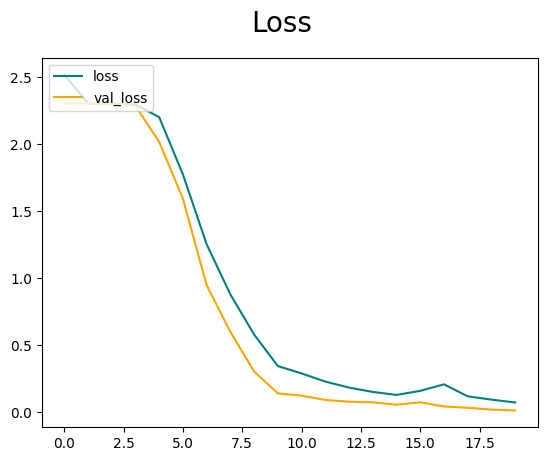

In [196]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()